# 임베딩(Embedding)

* 워드 임베딩은 단어를 컴퓨터가 이해하고, 효율적으로 처리할 수 있도록 단어를 벡터화하는 기술
* 워드 임베딩은 단어의 의미를 잘 표현해야만 하며, 현재까지도 많은 표현 방법이 연구
* 워드 임베딩을 거쳐 잘 표현된 단어 벡터들은 계산이 가능하며, 모델 투입도 가능

## 인코딩(Encoding)

* 기계는 자연어(영어, 한국어 등)을 이해할 수 없음
* 데이터를 기계가 이해할 수 있도록 숫자 등으로 변환해주는 작업이 필요
* 이러한 작업을 인코딩이라고 함

* 텍스트 처리에서는 주로 정수 인코딩, 원 핫 인코딩을 사용

### 정수 인코딩

#### dictionary를 이용한 정수 인코딩

* 각 단어와 정수 인덱스를 연결하고, 토큰을 변환해주는 정수 인코딩

In [1]:
text = "평생 살 것 처럼 꿈을 꾸어라. 그리고 내일 죽을 것처럼 오늘을 살아라"

tokens = [x for x in text.split()]
unique = set(tokens)
unique = list(unique)

token2idx = {}
for i in range(len(unique)):
    token2idx[unique[i]] = i

encode = [token2idx[x] for x in tokens]
encode

[7, 0, 9, 2, 11, 8, 10, 1, 4, 6, 3, 5]

#### keras를 이용한 정수 인코딩

* 정수 인코딩은 단어에 정수로 레이블을 부여
* `dictionary`, `nltk` 패키지를 이용한 방법들도 있지만, `keras`에서는 텍스트 처리에 필요한 도구들을 지원
* 해당 도구는 자동으로 단어 빈도가 높은 단어의 인덱스는 낮게끔 설정

In [6]:
from tensorflow.keras.preprocessing.text import Tokenizer

text = "평생 살 것 처럼 꿈을 꾸어라. 그리고 내일 죽을 것처럼 오늘을 살아라"

t = Tokenizer()
t.fit_on_texts([text])
print(t.word_index)
encoded = t.texts_to_sequences([text])[0]
print(encoded)
t.texts_to_sequences([text])

{'평생': 1, '살': 2, '것': 3, '처럼': 4, '꿈을': 5, '꾸어라': 6, '그리고': 7, '내일': 8, '죽을': 9, '것처럼': 10, '오늘을': 11, '살아라': 12}
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]]

### 원 핫 인코딩(One-Hot Encoding)

#### 조건문과 반복문을 이용한 원 핫 인코딩

* 원 핫 인코딩은 정수 인코딩한 결과를 벡터로 변환한 인코딩
* 원 핫 인코딩은 전체 단어 개수 만큼의 길이를 가진 배열에 해당 정수를 가진 위치는 1, 나머지는 0을 가진 벡터로 변환   

In [10]:
import numpy as np

one_hot = []
for i in range(len(encoded)):
    temp = []
    for j in range(len(encoded)):
        if j == (encoded[i]-1):
            temp.append(1)
        else:
            temp.append(0)
    one_hot.append(temp)

np.array(one_hot)

array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]])

#### keras를 이용한 원 핫 인코딩

* `keras`에서는 정수 인코딩을 원 핫 인코딩을 간단하게 변환해주는 `to_categorical()` 함수를 제공

In [11]:
from tensorflow.keras.utils import to_categorical

one_hot = to_categorical(encoded)
one_hot

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]],
      dtype=float32)

## IMDB 데이터

- 인터넷 영화 데이터베이스(Internet Movie Database)

- 양극단의 리뷰 5만개로 이루어진 데이터셋
  - 훈련데이터: 25,000개
  - 테스트데이터 : 25,000개

  <img src="https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQlk-f2SHB6-Vs3RWwIugMctsyEn2QVZWC5KQ&usqp=CAU">

- https://www.imdb.com/interfaces/

### module import

In [15]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, Flatten


### 데이터 로드

In [17]:
num_words = 1000

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=num_words)

In [18]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(25000,)
(25000,)
(25000,)
(25000,)


### 데이터 확인
- 긍정: 1
- 부정: 0

In [19]:
print(x_train[0])
print(y_train[0])

[1, 14, 22, 16, 43, 530, 973, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 2, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]
1


In [20]:
for i in range(10):
    if y_train[i] == 0:
        label = "부정"
    else:
        label = "긍정"
    print("{}\n{}".format(x_train[i], label))

[1, 14, 22, 16, 43, 530, 973, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 2, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]
긍정
[1, 194, 2, 194, 2, 78, 228, 5, 6, 2, 2, 2, 134, 26, 4, 715, 8, 118, 2, 14, 394, 20, 13, 119, 954, 189, 102, 5, 207, 110, 2, 2

### 데이터 전처리
- 모든 데이터를 같은 길이로 맞추기

  - `pad_sequence()`
    - 데이터가 maxlen보다 길면 데이터를 자름

    - 데이터가 길면 `padding` 설정
      - `pre`: 데이터 앞에 0으로 채움
      -  `post`: 데이터 뒤에 0으로 채움


- 모든 데이터(문장 하나하나)가 같은 길이로 맞추어야 `Embedding` 레이어를 사용할 수 있음

In [23]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_len = 100

pad_x_train = pad_sequences(x_train, maxlen=max_len, padding='pre')
pad_x_test = pad_sequences(x_test, maxlen=max_len, padding='pre')


In [24]:
print(len(x_train[0]))
print(len(pad_x_train[0]))

218
100


In [26]:
print(x_train[0])
print(pad_x_train[0])

[1, 14, 22, 16, 43, 530, 973, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 2, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]
[  2  33   6  22  12 215  28  77  52   5  14 407  16  82   2   8   4 107
 117   2  15 256   4   2   7   2   5 723  36  71  43 530

### 모델 구성

In [27]:
model = Sequential()

model.add(Embedding(input_dim=num_words, output_dim=32,
                    input_length=max_len))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 32)           32000     
                                                                 
 flatten (Flatten)           (None, 3200)              0         
                                                                 
 dense (Dense)               (None, 1)                 3201      
                                                                 
Total params: 35201 (137.50 KB)
Trainable params: 35201 (137.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### 모델 컴파일 및 학습

In [29]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

In [30]:
history = model.fit(pad_x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

Epoch 1/10
625/625 [==============================] - 15s 16ms/step - loss: 0.5683 - acc: 0.7086 - val_loss: 0.4322 - val_acc: 0.7996
Epoch 2/10
625/625 [==============================] - 4s 6ms/step - loss: 0.3775 - acc: 0.8315 - val_loss: 0.3904 - val_acc: 0.8190
Epoch 3/10
625/625 [==============================] - 3s 4ms/step - loss: 0.3395 - acc: 0.8508 - val_loss: 0.3908 - val_acc: 0.8208
Epoch 4/10
625/625 [==============================] - 2s 4ms/step - loss: 0.3120 - acc: 0.8679 - val_loss: 0.3991 - val_acc: 0.8184
Epoch 5/10
625/625 [==============================] - 2s 4ms/step - loss: 0.2819 - acc: 0.8839 - val_loss: 0.3973 - val_acc: 0.8216
Epoch 6/10
625/625 [==============================] - 3s 4ms/step - loss: 0.2494 - acc: 0.9032 - val_loss: 0.4125 - val_acc: 0.8142
Epoch 7/10
625/625 [==============================] - 3s 5ms/step - loss: 0.2154 - acc: 0.9219 - val_loss: 0.4284 - val_acc: 0.8124
Epoch 8/10
625/625 [==============================] - 3s 4ms/step - loss: 

### 시각화

In [31]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

<ipython-input-31-60d85d81d40e>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


In [32]:
hist_dict = history.history
hist_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

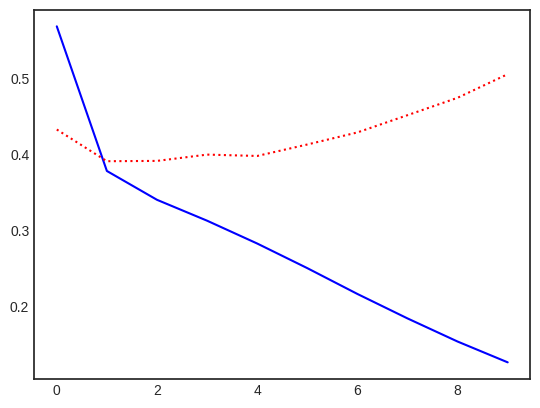

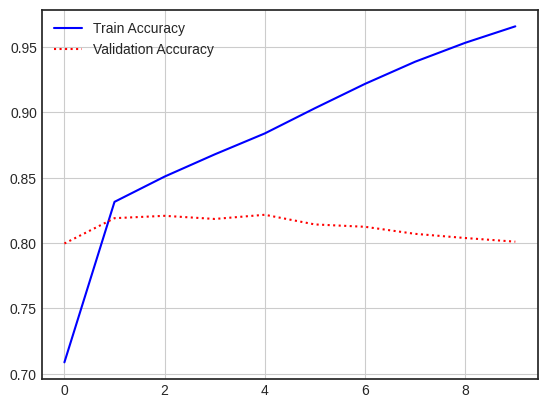

In [37]:
plt.plot(hist_dict['loss'], '-b', label='Train Loss')
plt.plot(hist_dict['val_loss'], 'r:', label='Validation Loss')

plt.figure()
plt.plot(hist_dict['acc'], '-b', label='Train Accuracy')
plt.plot(hist_dict['val_acc'], 'r:', label='Validation Accuracy')
plt.legend()
plt.grid()
plt.show()

### 모델 평가

### 단어의 수를 늘린 후 재학습

데이터 확인

위의 결과도 나쁘지 않으나 과적합이 되는 이유
- 단어간 관계나 문장 구조 등 의미적 연결을 고려하지 않음

- 시퀀스 전체를 고려한 특성을 학습하는 것은 `Embedding`층 위에 `RNN`층이나 `1D 합성곱`을 추가하는 것이 좋음


## Word2Vec

- 2013년, Mikolov 와 동료들이 제안한 모형

- 분류 등과 같이 별도의 레이블이 없이 텍스트 자체만 있어도 학습이 가능

- Word2Vec의 방식  
  주변 단어의 관계를 이용

  - CBOW(continuous bag-of-words)
    - 주변단어의 임베딩을 더해서 대상단어를 예측

  - Skip-Gram
    - 대상 단어의 임베딩으로 주변단어를 예측

    - 일반적으로 CBOW보다 성능이 좋은 편

    - 한번에 여러 단어를 예측해야하기 때문에 비효율적  
      최근에는 **negative sampling**이라는 방법을 사용

  <img src="https://www.researchgate.net/publication/328160770/figure/fig14/AS:679665089925122@1539056193562/CBOW-and-Skip-Gram-neural-architectures.ppm">

  <sub>출처: https://www.researchgate.net/figure/CBOW-and-Skip-Gram-neural-architectures_fig14_328160770</sub>

## T-SNE

* T-SNE(t-Stochastic Neighbor Embedding)은 고차원의 벡터들의 구조를 보존하며 저차원으로 사상하는 차원 축소 알고리즘
* 단어 임베딩에서도 생성된 고차원 벡터들을 시각화하기 위해 이 T-SNE 알고리즘을 많이 이용

* t-sne는 가장 먼저 원 공간의 데이터 유사도 $p_{ij}$와 임베딩 공간의 데이터 유사도 $q_{ij}$를 정의
* $x_i$에서 $x_j$ 간의 유사도 $p_{j|i}$ 는 다음과 같이 정의

$$ p_{j|i} = \frac {exp({-|x_i - x_j|}^2 / 2  \sigma^2_i)}{\sum_{k \neq i}exp({-|x_i - x_k|}^2 / 2  \sigma^2_i)} $$

* 설명하자면 $p_{j|i}$는 $x_i$와 $x_j$ 간의 거리에서 가중치 $\sigma^2_i$로 나눈 후, 이를 negative exponential을 취해 모든 점 간의 거리의 합과 나누어준 값으로 두 점 간의 거리가 가까울 수록 큰 값을 가짐

* 또한 임베딩 공간에서의 $y_i$에서 $y_j$ 간의 유사도 $q_{j|i}$ 는 다음과 같이 정의

$$ q_{j|i} = \frac {(1 + |y_i-y_j|^2)^{-1}}{\sum_{k \neq l}(1 + |y_i-y_j|^2)^{-1}} $$

* $q_{j|i}$는 $x_i$와 $x_j$ 간의 거리에서 1을 더해준 후 역수를 취한 값과 전체 합산 값과 나누어 유사도를 정의

* T-SNE의 학습은 $p_{j|i}$와 비슷해지도록 $q_{j|i}$의 위치를 조정하는 것이라고 할 수 있음



## 데이터 준비

## Gensim을 이용한 Word2Vec

### CBOW

### Skip-gram

### 임베딩 벡터 시각화

* metadata.tsv와 tensor.tsv 데이터 생성

* Embedding Projector: https://projector.tensorflow.org/